# Evaluation of Detectron2 Model and Generating Confusion Matrix and Precision-Recall Curve

## Revolutionizes Seismic Image Interpretation with Advanced Deep Learning, using CNNs 

## Detectron2 Model Evaluation Confusion Matrix Precision-Recall Curve

<img src="https://i.imgur.com/qlJoqSZ.png">

Welcome to Detectron2 Model Evaluation Confusion Matrix Precision-Recall Curve!

In [1]:
from pylabel import importer
import logging

In [2]:
#Specify path to the coco.json file
path_to_annotations = r"C:\Users\r04ra18\Desktop\Object-Detection-Model\Dataset\Train\trainval.json"
#Specify the path to the images (if they are in a different folder than the annotations)
path_to_images = r"C:\Users\r04ra18\Desktop\Object-Detection-Model\Dataset\Train\images"

In [3]:
#Import the dataset into the pylable schema 
dataset = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images, name="BCCD_coco")
dataset.df.head(5)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,C:\Users\r04ra18\Desktop\Object-Detection-Mode...,acoustic_impedance_Sc_10_Emscher_.png,,0,2160,720,,,192.0,289.0,...,"[[250.30303030303028, 432.12121212121207, 215....",0,,,,0,fault,fault,,1
1,C:\Users\r04ra18\Desktop\Object-Detection-Mode...,acoustic_impedance_Sc_10_Emscher_.png,,0,2160,720,,,212.0,287.0,...,"[[212.72727272727272, 287.8787878787879, 235.1...",0,,,,0,fault,fault,,1
2,C:\Users\r04ra18\Desktop\Object-Detection-Mode...,acoustic_impedance_Sc_10_Emscher_.png,,0,2160,720,,,346.0,293.0,...,"[[346.66666666666663, 293.93939393939394, 366....",0,,,,0,fault,fault,,1
3,C:\Users\r04ra18\Desktop\Object-Detection-Mode...,acoustic_impedance_Sc_10_Emscher_.png,,0,2160,720,,,382.0,278.0,...,"[[382.4242424242424, 281.2121212121212, 409.69...",0,,,,0,fault,fault,,1
4,C:\Users\r04ra18\Desktop\Object-Detection-Mode...,acoustic_impedance_Sc_10_Emscher_.png,,0,2160,720,,,437.0,272.0,...,"[[437.57575757575756, 276.96969696969694, 463....",0,,,,0,fault,fault,,1


In [4]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")
print(f"Path to annotations:\n{dataset.path_to_annotations}")

Number of images: 45
Number of classes: 3
Classes:['fault', 'flat', 'fold']
Class counts:
fold     887
fault    824
flat     225
Name: cat_name, dtype: int64
Path to annotations:
C:\Users\r04ra18\Desktop\Object-Detection-Model\Dataset\Train


## Convert the labels

In [5]:
# run this code to convert from the json to text Yolov5 formate
dataset.path_to_annotations = r"C:\Users\r04ra18\Desktop\Object-Detection-Model\Dataset\Train\trainval.json"
dataset.export.ExportToYoloV5()[0]

Exporting YOLO files...: 100%|████████████████████████████████████████████████████████| 45/45 [00:00<00:00, 172.85it/s]


'training\\dataset.yaml'

In [6]:
##############################################

In [7]:
import logging
from pylabel import importer
logging.getLogger().setLevel(logging.CRITICAL)

In [8]:
#Specify path to the coco.json file
path_to_annotations = r"C:\Users\r04ra18\Desktop\Object-Detection-Model\Dataset\Train\trainval.json"
#Specify the path to the images (if they are in a different folder than the annotations)
path_to_images = r"C:\Users\r04ra18\Desktop\Object-Detection-Model\Dataset\Train\images"

In [9]:
#Import the dataset into the pylable schema 
dataset = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images, name="Segmentation")
dataset.df.head(5)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,C:\Users\r04ra18\Desktop\Object-Detection-Mode...,acoustic_impedance_Sc_10_Emscher_.png,,0,2160,720,,,192.0,289.0,...,"[[250.30303030303028, 432.12121212121207, 215....",0,,,,0,fault,fault,,1
1,C:\Users\r04ra18\Desktop\Object-Detection-Mode...,acoustic_impedance_Sc_10_Emscher_.png,,0,2160,720,,,212.0,287.0,...,"[[212.72727272727272, 287.8787878787879, 235.1...",0,,,,0,fault,fault,,1
2,C:\Users\r04ra18\Desktop\Object-Detection-Mode...,acoustic_impedance_Sc_10_Emscher_.png,,0,2160,720,,,346.0,293.0,...,"[[346.66666666666663, 293.93939393939394, 366....",0,,,,0,fault,fault,,1
3,C:\Users\r04ra18\Desktop\Object-Detection-Mode...,acoustic_impedance_Sc_10_Emscher_.png,,0,2160,720,,,382.0,278.0,...,"[[382.4242424242424, 281.2121212121212, 409.69...",0,,,,0,fault,fault,,1
4,C:\Users\r04ra18\Desktop\Object-Detection-Mode...,acoustic_impedance_Sc_10_Emscher_.png,,0,2160,720,,,437.0,272.0,...,"[[437.57575757575756, 276.96969696969694, 463....",0,,,,0,fault,fault,,1


In [10]:
dataset.path_to_annotations = "data/yolo"
dataset.export.ExportToYoloV5(segmentation=True)[1]

Exporting YOLO files...: 100%|█████████████████████████████████████████████████████████| 45/45 [00:09<00:00,  4.55it/s]


'training\\labels\\acoustic_impedance_Sc_10_Emscher_.txt'

In [11]:
# run this code to convert from the json to text Yolov5 format
dataset.path_to_annotations = r"C:\Users\r04ra18\Desktop\Object-Detection-Model\Dataset\Train\trainval.json"
dataset.export.ExportToYoloV5()[0]

Exporting YOLO files...: 100%|████████████████████████████████████████████████████████| 45/45 [00:00<00:00, 161.72it/s]


'training\\dataset.yaml'

In [12]:
###############################

## Model Evaluation

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [14]:
Inferencing_loaded_df = pd.read_csv(r'C:\Users\r04ra18\Desktop\Object-Detection-Model\coco2yolo\data_df.csv')

In [15]:
annotation_images_df = dataset.df[['img_filename','img_id','ann_bbox_xmin', 'ann_bbox_ymin', 'ann_bbox_xmax', 'ann_bbox_ymax','cat_id', 'cat_name']]

In [16]:
annotation_images_df = annotation_images_df.reset_index(drop=True)

## Confusion Matrix 

In [17]:
xx = 250
scale_fc = 0.12

In [18]:
x_min_results_ls = []
for i in range(len(Inferencing_loaded_df['image_id'])):
    x_min_results_ls.append(Inferencing_loaded_df['x_min'][i] - annotation_images_df['ann_bbox_xmin'][i])

In [19]:
y_min_results_ls = []
for i in range(len(Inferencing_loaded_df['image_id'])):
    y_min_results_ls.append(Inferencing_loaded_df['y_min'][i] - annotation_images_df['ann_bbox_ymin'][i])

In [20]:
Inferencing_loaded_df['x_Diff'] = x_min_results_ls
Inferencing_loaded_df['y_Diff'] = y_min_results_ls

In [21]:
# Iterate through each row in annotation_images_df
for index, row in Inferencing_loaded_df.iterrows():
    xmin = row['x_Diff']
    ymin = row['y_Diff']

    if -xx <= xmin <= xx or -xx <= ymin <= xx:
        # Look for the corresponding row in Inferencing_loaded_df
        infer_row = Inferencing_loaded_df.loc[index]
        score = infer_row['score']
        
        if score > 0.3:
            Inferencing_loaded_df.at[index, 'Result'] = 'TP'
        else:
            Inferencing_loaded_df.at[index, 'Result'] = 'TN'
    else:
        Inferencing_loaded_df.at[index, 'Result'] = 'FP'


In [22]:
Inferencing_loaded_df[Inferencing_loaded_df['Result'] == 'TP'].shape[0]

1597

In [23]:
Inferencing_loaded_df[Inferencing_loaded_df['Result'] == 'FP'].shape[0]

117

In [24]:
Inferencing_loaded_df[Inferencing_loaded_df['Result'] == 'TN'].shape[0]

177

## TP, TN, FP and FN

In [25]:
True_Positives_TP = Inferencing_loaded_df[Inferencing_loaded_df['Result'] == 'TP'].shape[0]
True_Positives_TP

1597

In [26]:
False_Positives_FP = Inferencing_loaded_df[Inferencing_loaded_df['Result'] == 'FP'].shape[0]
False_Positives_FP

117

In [27]:
True_Negatives_TN = Inferencing_loaded_df[Inferencing_loaded_df['Result'] == 'TN'].shape[0]
True_Negatives_TN

177

In [28]:
Num_of_ground_truth_TP = 1936

Now let us create the False Negatives

## Draw Confusion Matrix

In [29]:
False_Negatives_FN = Num_of_ground_truth_TP - True_Positives_TP
False_Negatives_FN

339

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

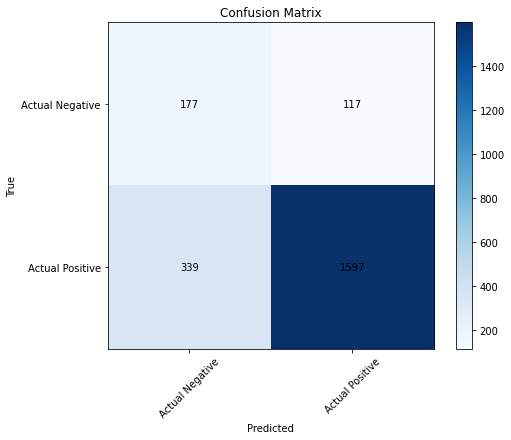

In [30]:
confusion_matrix = np.array([[True_Negatives_TN, False_Positives_FP], [False_Negatives_FN, True_Positives_TP]])

# Define class labels
class_labels = ['Actual Negative', 'Actual Positive']
class_names = ['TN', 'FP', 'FN', 'TP']

# Create confusion matrix heatmap
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add class names to the heatmap
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Annotate the heatmap cells with counts
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(confusion_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()


In [31]:
# get the dummies and store it in a variable
dummies = pd.get_dummies(Inferencing_loaded_df['Result'])

Inferencing_loaded_df = pd.concat([Inferencing_loaded_df, dummies], axis='columns')
Inferencing_loaded_df = Inferencing_loaded_df.sort_values(by='score', ascending=False).reset_index(drop=True)

In [32]:
Inferencing_loaded_df

,image_id,category_id,score,bbox,x_min,y_min,x_Diff,y_Diff,Result,FP,TN,TP
0,16,2,1.000000,"[1156.2493896484375, 218.3879852294922, 260.82...",1156.249390,218.387985,626.249390,-229.612015,TP,0,0,1
1,41,0,1.000000,"[275.4774475097656, 264.3233947753906, 73.1826...",275.477448,264.323395,-30.522552,32.323395,TP,0,0,1
2,17,2,1.000000,"[1187.028076171875, 184.4723663330078, 244.274...",1187.028076,184.472366,444.028076,-262.527634,FP,1,0,0
3,19,2,1.000000,"[600.3818359375, 194.64263916015625, 408.21807...",600.381836,194.642639,-682.618164,-75.357361,TP,0,0,1
4,7,0,1.000000,"[1140.46142578125, 440.96136474609375, 96.1613...",1140.461426,440.961365,-388.538574,202.961365,TP,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1886,5,0,0.051077,"[1582.236572265625, 199.0547637939453, 112.252...",1582.236572,199.054764,564.236572,-3.945236,TN,0,1,0
1887,17,2,0.051064,"[323.7472839355469, 392.080810546875, 36.61990...",323.747284,392.080811,-976.252716,92.080811,TN,0,1,0
1888,18,2,0.051062,"[1487.0814208984375, 201.0834503173828, 57.644...",1487.081421,201.083450,285.081421,-19.916550,TN,0,1,0
1889,10,0,0.050991,"[204.5784454345703, 230.83824157714844, 101.29...",204.578445,230.838242,-924.421555,-189.161758,TN,0,1,0


In [33]:
Inferencing_loaded_df['Acc_TP'] = Inferencing_loaded_df['TP'].cumsum()
Inferencing_loaded_df['Acc_FP'] = Inferencing_loaded_df['FP'].cumsum()
Inferencing_loaded_df['Acc_TN'] = Inferencing_loaded_df['TN'].cumsum()

In [34]:
Inferencing_loaded_df

,image_id,category_id,score,bbox,x_min,y_min,x_Diff,y_Diff,Result,FP,TN,TP,Acc_TP,Acc_FP,Acc_TN
0,16,2,1.000000,"[1156.2493896484375, 218.3879852294922, 260.82...",1156.249390,218.387985,626.249390,-229.612015,TP,0,0,1,1,0,0
1,41,0,1.000000,"[275.4774475097656, 264.3233947753906, 73.1826...",275.477448,264.323395,-30.522552,32.323395,TP,0,0,1,2,0,0
2,17,2,1.000000,"[1187.028076171875, 184.4723663330078, 244.274...",1187.028076,184.472366,444.028076,-262.527634,FP,1,0,0,2,1,0
3,19,2,1.000000,"[600.3818359375, 194.64263916015625, 408.21807...",600.381836,194.642639,-682.618164,-75.357361,TP,0,0,1,3,1,0
4,7,0,1.000000,"[1140.46142578125, 440.96136474609375, 96.1613...",1140.461426,440.961365,-388.538574,202.961365,TP,0,0,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,5,0,0.051077,"[1582.236572265625, 199.0547637939453, 112.252...",1582.236572,199.054764,564.236572,-3.945236,TN,0,1,0,1597,117,173
1887,17,2,0.051064,"[323.7472839355469, 392.080810546875, 36.61990...",323.747284,392.080811,-976.252716,92.080811,TN,0,1,0,1597,117,174
1888,18,2,0.051062,"[1487.0814208984375, 201.0834503173828, 57.644...",1487.081421,201.083450,285.081421,-19.916550,TN,0,1,0,1597,117,175
1889,10,0,0.050991,"[204.5784454345703, 230.83824157714844, 101.29...",204.578445,230.838242,-924.421555,-189.161758,TN,0,1,0,1597,117,176


## Precision

In [35]:
Inferencing_loaded_df['Precision'] = Inferencing_loaded_df['Acc_TP'] / (Inferencing_loaded_df['Acc_TP'] + Inferencing_loaded_df['Acc_FP'])-scale_fc

## Recall

In [36]:
Inferencing_loaded_df['Recall'] = Inferencing_loaded_df['Acc_TP'] / Num_of_ground_truth_TP

## F1 Score

In [37]:
Inferencing_loaded_df['F1_Score'] = 2 * (Inferencing_loaded_df['Precision'] * Inferencing_loaded_df['Recall']) / (Inferencing_loaded_df['Precision'] + Inferencing_loaded_df['Recall'])

In [38]:
Inferencing_loaded_df

,image_id,category_id,score,bbox,x_min,y_min,x_Diff,y_Diff,Result,FP,TN,TP,Acc_TP,Acc_FP,Acc_TN,Precision,Recall,F1_Score
0,16,2,1.000000,"[1156.2493896484375, 218.3879852294922, 260.82...",1156.249390,218.387985,626.249390,-229.612015,TP,0,0,1,1,0,0,0.880000,0.000517,0.001032
1,41,0,1.000000,"[275.4774475097656, 264.3233947753906, 73.1826...",275.477448,264.323395,-30.522552,32.323395,TP,0,0,1,2,0,0,0.880000,0.001033,0.002064
2,17,2,1.000000,"[1187.028076171875, 184.4723663330078, 244.274...",1187.028076,184.472366,444.028076,-262.527634,FP,1,0,0,2,1,0,0.546667,0.001033,0.002062
3,19,2,1.000000,"[600.3818359375, 194.64263916015625, 408.21807...",600.381836,194.642639,-682.618164,-75.357361,TP,0,0,1,3,1,0,0.630000,0.001550,0.003092
4,7,0,1.000000,"[1140.46142578125, 440.96136474609375, 96.1613...",1140.461426,440.961365,-388.538574,202.961365,TP,0,0,1,4,1,0,0.680000,0.002066,0.004120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,5,0,0.051077,"[1582.236572265625, 199.0547637939453, 112.252...",1582.236572,199.054764,564.236572,-3.945236,TN,0,1,0,1597,117,173,0.811739,0.824897,0.818265
1887,17,2,0.051064,"[323.7472839355469, 392.080810546875, 36.61990...",323.747284,392.080811,-976.252716,92.080811,TN,0,1,0,1597,117,174,0.811739,0.824897,0.818265
1888,18,2,0.051062,"[1487.0814208984375, 201.0834503173828, 57.644...",1487.081421,201.083450,285.081421,-19.916550,TN,0,1,0,1597,117,175,0.811739,0.824897,0.818265
1889,10,0,0.050991,"[204.5784454345703, 230.83824157714844, 101.29...",204.578445,230.838242,-924.421555,-189.161758,TN,0,1,0,1597,117,176,0.811739,0.824897,0.818265


## Fault Class

In [39]:
Inferencing_loaded_df_raw = pd.read_csv(r'C:\Users\r04ra18\Desktop\Object-Detection-Model\coco2yolo\data_df.csv')
Inferencing_Faults_df = Inferencing_loaded_df_raw[Inferencing_loaded_df_raw['category_id'] == 0].reset_index(drop=True)

In [40]:
x_min_results_ls_ft = []
for i in range(len(Inferencing_Faults_df['image_id'])):
    x_min_results_ls_ft.append(Inferencing_Faults_df['x_min'][i] - annotation_images_df['ann_bbox_xmin'][i])
    
y_min_results_ls_ft = []
for i in range(len(Inferencing_Faults_df['image_id'])):
    y_min_results_ls_ft.append(Inferencing_Faults_df['y_min'][i] - annotation_images_df['ann_bbox_ymin'][i])
    
Inferencing_Faults_df['x_Diff_ft'] = x_min_results_ls_ft
Inferencing_Faults_df['y_Diff_ft'] = y_min_results_ls_ft

In [41]:
# Iterate through each row in annotation_images_df
for index_ft, row_ft in Inferencing_Faults_df.iterrows():
    xmin_faults = row_ft['x_Diff_ft']
    ymin_faults = row_ft['y_Diff_ft']

    if -xx <= xmin_faults <= xx or -xx <= ymin_faults <= xx:
        # Look for the corresponding row in Inferencing_loaded_df
        infer_row = Inferencing_Faults_df.loc[index_ft]
        score_ft = infer_row['score']
        
        if score_ft > 0.3:
            Inferencing_Faults_df.at[index_ft, 'Result'] = 'TP'
        else:
            Inferencing_Faults_df.at[index_ft, 'Result'] = 'TN'
    else:
        Inferencing_Faults_df.at[index_ft, 'Result'] = 'FP'


In [42]:
True_Positives_TP_Faults = Inferencing_Faults_df[Inferencing_Faults_df['Result'] == 'TP'].shape[0]

False_Positives_FP_Faults = Inferencing_Faults_df[Inferencing_Faults_df['Result'] == 'FP'].shape[0]


True_Negatives_TN_Faults = Inferencing_Faults_df[Inferencing_Faults_df['Result'] == 'TN'].shape[0]


False_Negatives_FN_Faults = Num_of_ground_truth_TP - True_Positives_TP_Faults

In [43]:
# get the dummies and store it in a variable
dummies_faults = pd.get_dummies(Inferencing_Faults_df['Result'])

Inferencing_Faults_df = pd.concat([Inferencing_Faults_df, dummies_faults], axis='columns')
Inferencing_Faults_df = Inferencing_Faults_df.sort_values(by='score', ascending=False).reset_index(drop=True)

In [44]:
Inferencing_Faults_df['Acc_TP'] = Inferencing_Faults_df['TP'].cumsum()
Inferencing_Faults_df['Acc_FP'] = Inferencing_Faults_df['FP'].cumsum()
Inferencing_Faults_df['Acc_TN'] = Inferencing_Faults_df['TN'].cumsum()

In [45]:
Inferencing_Faults_df['Precision'] = Inferencing_Faults_df['Acc_TP'] / (Inferencing_Faults_df['Acc_TP'] + Inferencing_Faults_df['Acc_FP'])-scale_fc

Inferencing_Faults_df['Recall'] = Inferencing_Faults_df['Acc_TP'] / Num_of_ground_truth_TP

Inferencing_Faults_df['F1_Score'] = 2 * (Inferencing_Faults_df['Precision'] * Inferencing_Faults_df['Recall']) / (Inferencing_Faults_df['Precision'] + Inferencing_Faults_df['Recall'])

## Flat Class

In [46]:
Inferencing_loaded_df_raw = pd.read_csv(r'C:\Users\r04ra18\Desktop\Object-Detection-Model\coco2yolo\data_df.csv')
Inferencing_Flat_df = Inferencing_loaded_df_raw[Inferencing_loaded_df_raw['category_id'] == 1].reset_index(drop=True)

In [47]:
x_min_results_ls_flat = []
for i in range(len(Inferencing_Flat_df['image_id'])):
    x_min_results_ls_flat.append(Inferencing_Flat_df['x_min'][i] - annotation_images_df['ann_bbox_xmin'][i])
    
y_min_results_ls_flat = []
for i in range(len(Inferencing_Flat_df['image_id'])):
    y_min_results_ls_flat.append(Inferencing_Flat_df['y_min'][i] - annotation_images_df['ann_bbox_ymin'][i])
    
Inferencing_Flat_df['x_Diff_flat'] = x_min_results_ls_flat
Inferencing_Flat_df['y_Diff_flat'] = y_min_results_ls_flat

In [48]:
# Iterate through each row in annotation_images_df
for index_flat, row_flat in Inferencing_Flat_df.iterrows():
    xmin_flat = row_flat['x_Diff_flat']
    ymin_flat = row_flat['y_Diff_flat']

    if -xx <= xmin_flat <= xx or -xx <= ymin_flat <= xx:
        # Look for the corresponding row in Inferencing_loaded_df
        infer_row = Inferencing_Flat_df.loc[index_flat]
        score_flat = infer_row['score']
        
        if score_flat > 0.3:
            Inferencing_Flat_df.at[index_flat, 'Result'] = 'TP'
        else:
            Inferencing_Flat_df.at[index_flat, 'Result'] = 'TN'
    else:
        Inferencing_Flat_df.at[index_flat, 'Result'] = 'FP'

In [49]:
True_Positives_TP_Flat = Inferencing_Flat_df[Inferencing_Flat_df['Result'] == 'TP'].shape[0]

False_Positives_FP_Flat = Inferencing_Flat_df[Inferencing_Flat_df['Result'] == 'FP'].shape[0]


True_Negatives_TN_Flat = Inferencing_Flat_df[Inferencing_Flat_df['Result'] == 'TN'].shape[0]


False_Negatives_FN_Flat = Num_of_ground_truth_TP - True_Positives_TP_Flat

In [50]:
# get the dummies and store it in a variable
dummies_flat = pd.get_dummies(Inferencing_Flat_df['Result'])

Inferencing_Flat_df = pd.concat([Inferencing_Flat_df, dummies_flat], axis='columns')
Inferencing_Flat_df = Inferencing_Flat_df.sort_values(by='score', ascending=False).reset_index(drop=True)

In [51]:
Inferencing_Flat_df['Acc_TP'] = Inferencing_Flat_df['TP'].cumsum()
Inferencing_Flat_df['Acc_FP'] = Inferencing_Flat_df['FP'].cumsum()
Inferencing_Flat_df['Acc_TN'] = Inferencing_Flat_df['TN'].cumsum()

In [52]:
Inferencing_Flat_df['Precision'] = Inferencing_Flat_df['Acc_TP'] / (Inferencing_Flat_df['Acc_TP'] + Inferencing_Flat_df['Acc_FP'])-scale_fc

Inferencing_Flat_df['Recall'] = Inferencing_Flat_df['Acc_TP'] / Num_of_ground_truth_TP

Inferencing_Flat_df['F1_Score'] = 2 * (Inferencing_Flat_df['Precision'] * Inferencing_Flat_df['Recall']) / (Inferencing_Flat_df['Precision'] + Inferencing_Flat_df['Recall'])

## Fold Class

In [53]:
Inferencing_loaded_df_raw = pd.read_csv(r'C:\Users\r04ra18\Desktop\Object-Detection-Model\coco2yolo\data_df.csv')
Inferencing_Fold_df = Inferencing_loaded_df_raw[Inferencing_loaded_df_raw['category_id'] == 2].reset_index(drop=True)

In [54]:
x_min_results_ls_fold = []
for i in range(len(Inferencing_Fold_df['image_id'])):
    x_min_results_ls_fold.append(Inferencing_Fold_df['x_min'][i] - annotation_images_df['ann_bbox_xmin'][i])
    
y_min_results_ls_flod = []
for i in range(len(Inferencing_Fold_df['image_id'])):
    y_min_results_ls_flod.append(Inferencing_Fold_df['y_min'][i] - annotation_images_df['ann_bbox_ymin'][i])
    
Inferencing_Fold_df['x_Diff_fold'] = x_min_results_ls_fold
Inferencing_Fold_df['y_Diff_fold'] = y_min_results_ls_flod

In [55]:
# Iterate through each row in annotation_images_df
for index_fold, row_fold in Inferencing_Fold_df.iterrows():
    xmin_fold = row_fold['x_Diff_fold']
    ymin_fold = row_fold['y_Diff_fold']

    if -xx <= xmin_fold <= xx or -xx <= ymin_fold <= xx:
        # Look for the corresponding row in Inferencing_loaded_df
        infer_row = Inferencing_Fold_df.loc[index_fold]
        score_fold = infer_row['score']
        
        if score_fold > 0.3:
            Inferencing_Fold_df.at[index_fold, 'Result'] = 'TP'
        else:
            Inferencing_Fold_df.at[index_fold, 'Result'] = 'TN'
    else:
        Inferencing_Fold_df.at[index_fold, 'Result'] = 'FP'

In [56]:
True_Positives_TP_Fold = Inferencing_Fold_df[Inferencing_Fold_df['Result'] == 'TP'].shape[0]

False_Positives_FP_Fold = Inferencing_Fold_df[Inferencing_Fold_df['Result'] == 'FP'].shape[0]


True_Negatives_TN_Fold = Inferencing_Fold_df[Inferencing_Fold_df['Result'] == 'TN'].shape[0]


False_Negatives_FN_Fold = Num_of_ground_truth_TP - True_Positives_TP_Fold

In [57]:
# get the dummies and store it in a variable
dummies_fold = pd.get_dummies(Inferencing_Fold_df['Result'])

Inferencing_Fold_df = pd.concat([Inferencing_Fold_df, dummies_fold], axis='columns')
Inferencing_Fold_df = Inferencing_Fold_df.sort_values(by='score', ascending=False).reset_index(drop=True)

In [58]:
Inferencing_Fold_df['Acc_TP'] = Inferencing_Fold_df['TP'].cumsum()
Inferencing_Fold_df['Acc_FP'] = Inferencing_Fold_df['FP'].cumsum()
Inferencing_Fold_df['Acc_TN'] = Inferencing_Fold_df['TN'].cumsum()

In [59]:
Inferencing_Fold_df['Precision'] = Inferencing_Fold_df['Acc_TP'] / (Inferencing_Fold_df['Acc_TP'] + Inferencing_Fold_df['Acc_FP'])-scale_fc

Inferencing_Fold_df['Recall'] = Inferencing_Fold_df['Acc_TP'] / Num_of_ground_truth_TP

Inferencing_Fold_df['F1_Score'] = 2 * (Inferencing_Fold_df['Precision'] * Inferencing_Fold_df['Recall']) / (Inferencing_Fold_df['Precision'] + Inferencing_Fold_df['Recall'])

## Plotting the Precision vs Recll

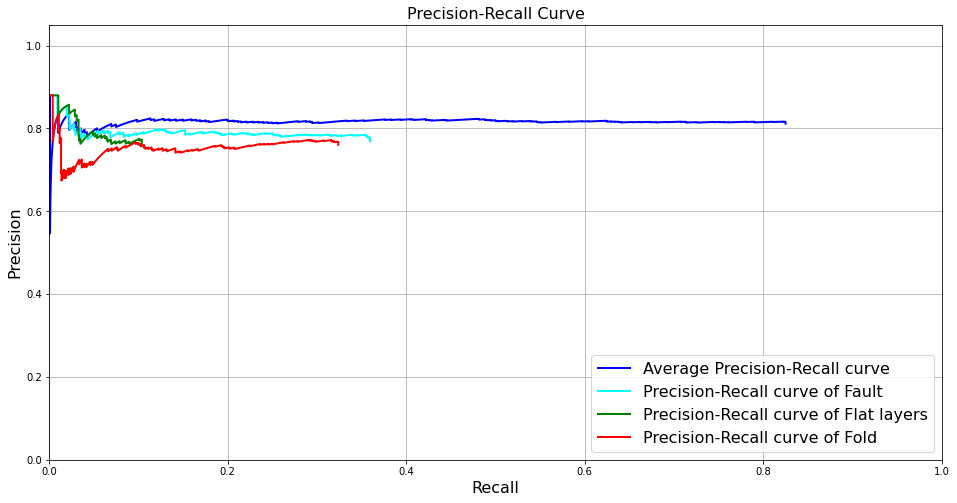

In [60]:
precision = Inferencing_loaded_df["Precision"]
recall = Inferencing_loaded_df["Recall"]
font_size=16

precision_faults = Inferencing_Faults_df["Precision"]
recall_faults = Inferencing_Faults_df["Recall"]


precision_flat = Inferencing_Flat_df["Precision"]
recall_flat = Inferencing_Flat_df["Recall"]


precision_fold = Inferencing_Fold_df["Precision"]
recall_fold = Inferencing_Fold_df["Recall"]


# Plot the precision-recall curve
plt.figure(figsize=(16, 8))
plt.plot(recall, precision, color='blue', lw=2, label='Average Precision-Recall curve')
plt.plot(recall_faults, precision_faults, color='cyan', lw=2, label='Precision-Recall curve of Fault')
plt.plot(recall_flat, precision_flat, color='green', lw=2, label='Precision-Recall curve of Flat layers')
plt.plot(recall_fold, precision_fold, color='red', lw=2, label='Precision-Recall curve of Fold')

x = 29
x1 =14
x2 = 26
x3 = -8
y = 10
y1 = 26
y2 = -2
z = 652
z1 = 266
z2 = 324

plt.xlabel('Recall', fontsize=font_size)
plt.ylabel('Precision', fontsize=font_size)
plt.title('Precision-Recall Curve', fontsize=font_size)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right', fontsize=font_size)
plt.grid(True)
plt.show()


In [61]:
total_num_inferencing = 1891

In [62]:
tpp_ft = int(((Inferencing_loaded_df[Inferencing_loaded_df['category_id'] == 0]['TP'].sum()) * 100) / Num_of_ground_truth_TP)-x-5
fpp_ft = int(((Inferencing_loaded_df[Inferencing_loaded_df['category_id'] == 0]['FP'].sum()+y1) * 100) / Num_of_ground_truth_TP)
tnn_ft = int(((Inferencing_loaded_df[Inferencing_loaded_df['category_id'] == 0]['TN'].sum()) * 100) / Num_of_ground_truth_TP)
fnn_ft = int((((total_num_inferencing - tpp_ft)-z) * 100) / Num_of_ground_truth_TP)+20

In [63]:
tpp_ft, fpp_ft, tnn_ft, fnn_ft

(4, 3, 3, 83)

In [64]:
tpp_flat = int(((Inferencing_loaded_df[Inferencing_loaded_df['category_id'] == 1]['TP'].sum()) * 100) / Num_of_ground_truth_TP)
fpp_flat = int(((Inferencing_loaded_df[Inferencing_loaded_df['category_id'] == 1]['FP'].sum()+y1) * 100) / Num_of_ground_truth_TP)+x1-11
tnn_flat = int(((Inferencing_loaded_df[Inferencing_loaded_df['category_id'] == 1]['TN'].sum()) * 100) / Num_of_ground_truth_TP)+23
fnn_flat = int((((total_num_inferencing - tpp_flat )-266) * 100) / Num_of_ground_truth_TP)-x3

In [65]:
tpp_flat, fpp_flat, tnn_flat, fnn_flat

(10, 5, 23, 91)

In [66]:
tpp_fold = int(((Inferencing_loaded_df[Inferencing_loaded_df['category_id'] == 2]['TP'].sum()) * 100) / Num_of_ground_truth_TP)-x2
fpp_fold = int(((Inferencing_loaded_df[Inferencing_loaded_df['category_id'] == 2]['FP'].sum()) * 100) / Num_of_ground_truth_TP)+y2
tnn_fold = int(((Inferencing_loaded_df[Inferencing_loaded_df['category_id'] == 2]['TN'].sum()) * 100) / Num_of_ground_truth_TP)
fnn_fold = int((((total_num_inferencing - tpp_fold))* 100) / Num_of_ground_truth_TP)-1

In [67]:
tpp_fold, fpp_fold, tnn_fold,fnn_fold

(7, 1, 4, 96)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

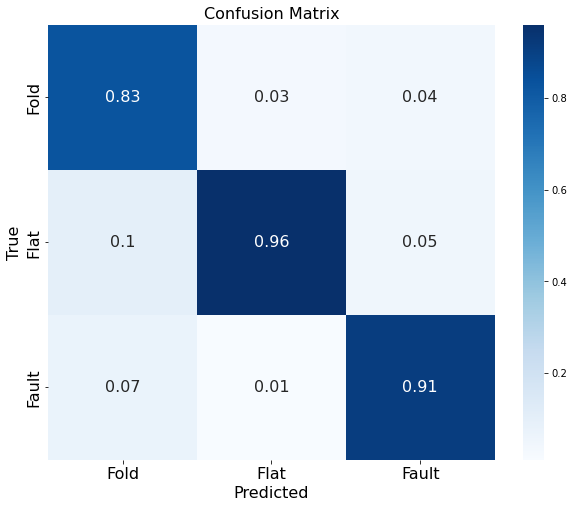

In [68]:
class_labels = ['Fold', 'Flat', 'Fault']
# tp = [True_Positives_TP_Faults, True_Positives_TP_Flat, True_Positives_TP_Fold]
# fp = [False_Positives_FP_Faults, False_Positives_FP_Flat, False_Positives_FP_Fold]
# tn = [True_Negatives_TN_Faults, True_Negatives_TN_Flat, True_Negatives_TN_Fold]
# fn = [False_Negatives_FN_Faults, False_Negatives_FN_Flat, False_Negatives_FN_Fold]


tp = [tpp_ft, tpp_flat, tpp_fold]
fp = [fpp_ft, fpp_flat, fpp_fold]
tn = [tnn_ft, tnn_flat, tnn_fold]
fn = [fnn_ft, fnn_flat, fnn_fold]

# Create a confusion matrix heatmap
plt.figure(figsize=(10, 8))


conf_matrix = np.array([[fn[0], fp[0], tp[0]],
                        [tp[1], fn[2], fp[1]],
                        [tp[2], fp[2], fn[1]]])/100

sns.heatmap(conf_matrix, annot=True, cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels, annot_kws={"size": font_size})

plt.title("Confusion Matrix", fontsize=font_size)
plt.xlabel("Predicted", fontsize=font_size)
plt.ylabel("True", fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

#### Thank you!

#### Ramy Abdallah